# Program 1

## a.) 3D surface plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl

In [2]:
car_data = pd.read_csv("Toyota.csv", index_col=0, na_values=["??", "????"])
car_data.dropna(axis=0, inplace=True)
car_data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1423,7950,80.0,35821.0,Petrol,86.0,0.0,1,1300,3,1015
1424,7750,73.0,34717.0,Petrol,86.0,0.0,0,1300,3,1015
1429,8950,78.0,24000.0,Petrol,86.0,1.0,1,1300,5,1065
1430,8450,80.0,23000.0,Petrol,86.0,0.0,0,1300,3,1015


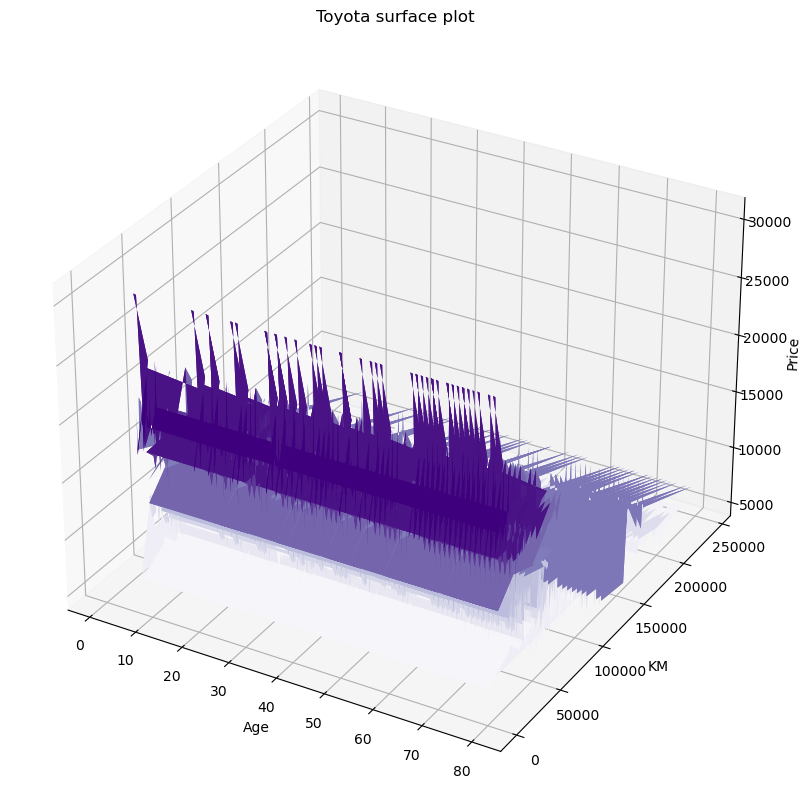

In [22]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
x = car_data["Age"]
y = car_data["KM"]
xx, yy = np.meshgrid(x, y)
z = np.array(car_data["Price"])
ax.set_zlabel("Price")
ax.plot_surface(xx, yy, z.reshape(-1, 1), cmap="Purples")
plt.title("Toyota surface plot")
plt.xlabel("Age")
plt.ylabel("KM")
plt.show()

In [3]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def put(self, value):
        self.queue.append(value)
        
    def get(self):
        try:
            minimum = 0
            for i in range(1,len(self.queue)):
                if self.queue[i][0] < self.queue[minimum][0]:
                    minimum = i
            item = self.queue[minimum]
            del self.queue[minimum]
            return item
        except IndexError:
            print("Index has a problem")
            exit()
            
    def isEmpty(self):
        return len(self.queue) == 0   
    
def best_first_search(graph, heuristic, source, goal):
    visited = []
    pq = PQueue()
    pq.put((0, [source]))
    
    while not pq.isEmpty():
        cost, path = pq.get()
        node = path[-1]
        
        if node == goal:
            visited.append(node)
            return (visited, path)
        
        visited.append(node)
        
        for adj, weight in graph[node]:
            if adj not in visited:
                pri = heuristic[adj]
                new_path = list(path)
                new_path.append(adj)
                pq.put((pri, new_path))
                
    return None
    
n = int(input("Enter the number of vertices: "))
graph = [[] for _ in range(n)]
e = int(input("Enter the number of edges: "))
print("Enter the edge as source, destination and weight: ")
for i in range(e):
    u, v, w = map(int, input().split())
    graph[u].append((v, w))
                 
heuristic = {}
print("Enter the heuristic values: ")
for i in range(n):
    heuristic[i] = int(input())
src = int(input("Enter the source vertex: "))
dest = int(input("Enter the goal vertex: "))
    
res = best_first_search(graph, heuristic, src, dest)
if res == None:
    print("There is no path from given source to destination")
else:
    print("The path is: ")
    for i in res[1]:
        print(i, end=" --> " )
    print()
    print("The visited nodes are: ")
    for i in res[0]:
        print(i, end=" --> ")


Enter the number of vertices: 10
Enter the number of edges: 9
Enter the edge as source, destination and weight: 
0 1 2
0 2 1
0 3 10
1 4 3
1 5 2
2 6 9
3 7 5
3 8 2
7 9 5
Enter the heuristic values: 
20
22
21
10
25
24
30
5
12
0
Enter the source vertex: 0
Enter the goal vertex: 9
The path is: 
0 --> 3 --> 7 --> 9 --> 
The visited nodes are: 
0 --> 3 --> 7 --> 9 --> 